In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd

In [22]:
CV_data =pd.read_csv('creditcard.csv')
                         
# inferSchema (default false): infers the input schema automatically from data. It requires one extra pass over the data.                          
CV_data.head(5)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,182545,125447.0,1.816429,0.146354,0.046576,3.598831,-0.119489,0.764143,-0.673691,0.375930,...,0.235474,0.539597,0.240714,0.691290,-0.349606,-0.055401,-0.011830,-0.033766,18.92,0
1,264950,161666.0,-1.132632,-0.217753,-1.018984,-0.725154,1.624606,-1.123202,0.151016,0.322056,...,0.439623,0.855120,-0.058180,0.115257,-0.786822,0.591033,0.308595,0.055496,24.95,0
2,278614,168323.0,1.754189,0.230348,0.019154,3.927093,-0.087202,0.227146,-0.115704,0.053371,...,-0.374842,-1.136878,0.441901,-0.183241,-0.580846,-0.508929,-0.005608,-0.019285,64.40,0
3,10160,15578.0,1.028419,0.252588,1.744422,2.801771,-0.613426,0.860407,-0.849896,0.375564,...,-0.148324,-0.044123,0.103698,0.142224,0.132222,-0.080803,0.026917,0.016913,0.00,0
4,64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0


In [24]:
from matplotlib import pyplot as plt 
import numpy as np  

unique, counts = np.unique(CV_data['Class'], return_counts=True)
p = dict(zip(unique, counts))
p

{0: 85282, 1: 160}

In [33]:
r1 = p[0]/p[1]
r1

533.0125

In [46]:
r2 = p[1]/p[0]
r3 = 1 - r2
r3

0.9981238713913839

Text(0,0.5,'value')

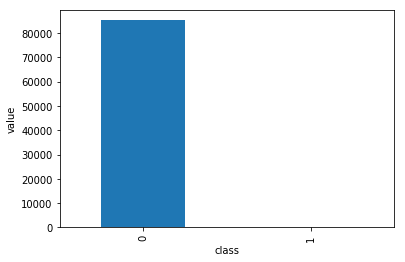

In [26]:
count=CV_data['Class'].value_counts()
count.plot(kind='bar')
plt.xlabel('class')
plt.ylabel('value')

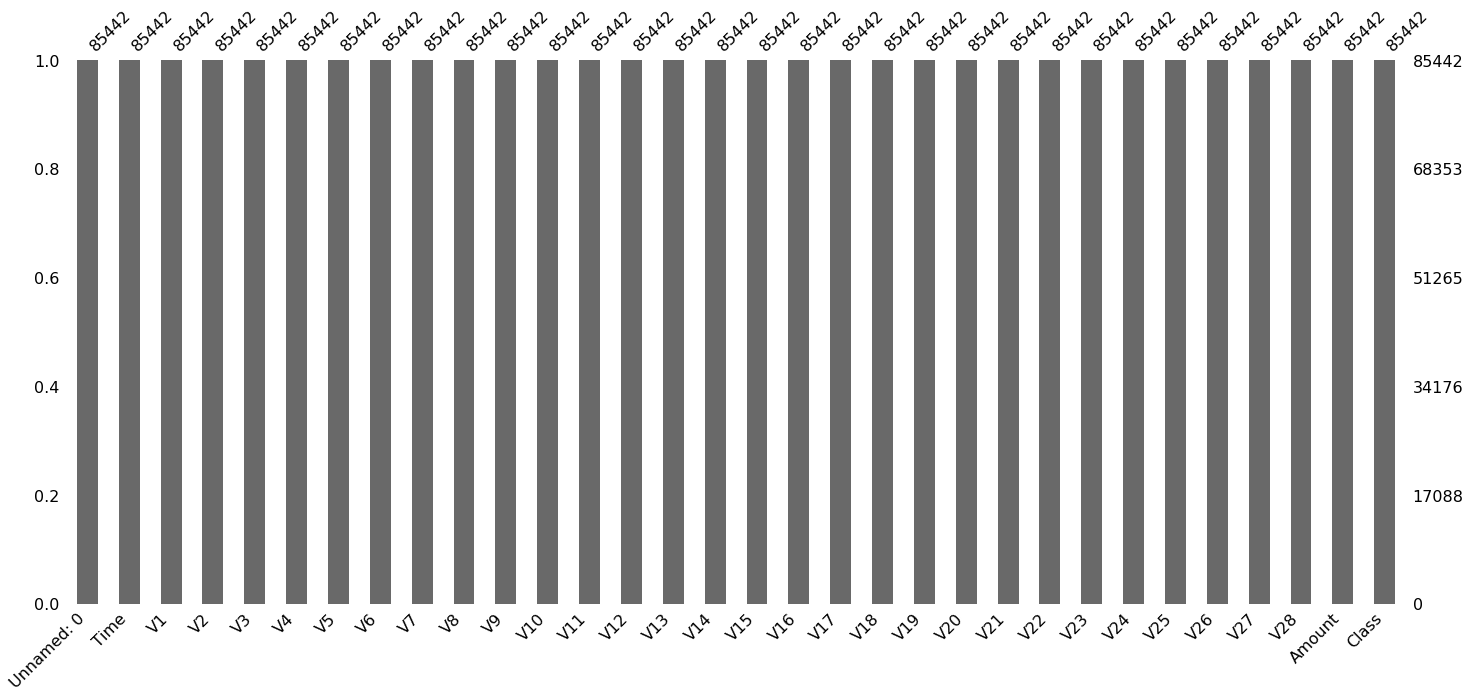

In [27]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import missingno as msno
msno.bar(CV_data)

There are several ways to approach this classification problem taking into consideration this unbalance.

- Collect more data? Nice strategy but not applicable in this case.
- Changing the performance metric:
1. Use the confusio nmatrix to calculate Precision, Recall
2. F1score (weighted average of precision recall)
3. Use **Kappa** - which is a classification accuracy normalized by the imbalance of the classes in the data
4. ROC curves - calculates sensitivity/specificity ratio.

### Normalization

In [29]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
CV_data['norm_amount']=ss.fit_transform(CV_data['Amount'].values.reshape(-1,1))
data=CV_data.drop(['Amount','Time'],axis=1)
data.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,norm_amount
0,182545,1.816429,0.146354,0.046576,3.598831,-0.119489,0.764143,-0.673691,0.375930,-0.534457,...,0.235474,0.539597,0.240714,0.691290,-0.349606,-0.055401,-0.011830,-0.033766,0,-0.294421
1,264950,-1.132632,-0.217753,-1.018984,-0.725154,1.624606,-1.123202,0.151016,0.322056,-0.238261,...,0.439623,0.855120,-0.058180,0.115257,-0.786822,0.591033,0.308595,0.055496,0,-0.269052
2,278614,1.754189,0.230348,0.019154,3.927093,-0.087202,0.227146,-0.115704,0.053371,-0.475027,...,-0.374842,-1.136878,0.441901,-0.183241,-0.580846,-0.508929,-0.005608,-0.019285,0,-0.103078
3,10160,1.028419,0.252588,1.744422,2.801771,-0.613426,0.860407,-0.849896,0.375564,1.171960,...,-0.148324,-0.044123,0.103698,0.142224,0.132222,-0.080803,0.026917,0.016913,0,-0.374021
4,64,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,0,0.651104


In [30]:
# 去掉unnamed的第一列
data=data.iloc[:,1:]
# x & y
x=data.drop('Class',axis=1).values
y=data.loc[:,'Class'].values

## 直接在原数据上建模

In [64]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.30, random_state=0)

x_train_undersample,x_test_undersample,y_train_undersample,y_test_undersample=train_test_split(
X_undersample, y_undersample, test_size=0.30, random_state=0)

In [65]:
lr2=LogisticRegression(C=0.01,random_state=0)
lr2.fit(x_train,y_train)
y_pred2=lr2.predict(x_test)

accuracy 0.9988686458861624
recall_score 0.6206896551724138


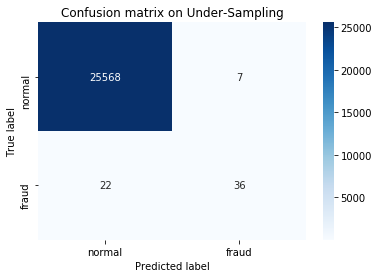

In [66]:
# recall很低，说明被预测到fraud值很少，这样极其有害公司利润，坏账率上升，利润率降低，然后就失业了。
metric(y_test,y_pred2)

### UNDER-sampling

In [31]:
number_frauds=len(data[data.Class==1])
fraud_indices=np.array(data[data.Class==1].index)

normal_indices=data[data.Class==0].index

rand_normal_indices=np.random.choice(normal_indices,number_frauds,replace=False)

# 保留所有fraud的index，和部分选出的unfraud的index，组合起来
under_sample_indices=np.concatenate([fraud_indices,rand_normal_indices])
# 选出下采样后的数据集
under_sample_data=data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class'].values
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class'].values.ravel()

In [32]:
print("Percentage of normal transactions:", len(under_sample_data[under_sample_data.Class==0])/
     len(under_sample_data))
print("Percentage of fraud transactions:", len(under_sample_data[under_sample_data.Class==1])/
     len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))
# 港真，320个数据有点少吧。

Percentage of normal transactions: 0.5
Percentage of fraud transactions: 0.5
Total number of transactions in resampled data:  320


### Splitting 原始&下采样 data into train and test set

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.30, random_state=0)

x_train_undersample,x_test_undersample,y_train_undersample,y_test_undersample=train_test_split(
X_undersample, y_undersample, test_size=0.30, random_state=0)

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import (make_scorer, accuracy_score, confusion_matrix, precision_recall_curve,
                             auc,roc_curve, roc_auc_score ,recall_score, classification_report)

### parameters tuning

In [37]:
fold=KFold(n_splits=5,random_state=0)
lr=LogisticRegression(random_state=0)
# recall score other than precision
score=make_scorer(recall_score)
# 正则化强度的倒数
c=[0.01, 0.1,1,10,10]
param={'C':c}
grd=GridSearchCV(lr,param,scoring=score,cv=fold)
grd.fit(x_train_undersample,y_train_undersample)
print(grd.best_score_, grd.best_params_, grd.scorer_)

0.9080052759740259 {'C': 0.01} make_scorer(recall_score)


In [39]:
# build model
lr=LogisticRegression(C=0.01,penalty='l2',random_state=0)
# 用下采样之后的数据进行模型拟合
lr.fit(x_train_undersample,y_train_undersample)
# 
y_pred_undersample=lr.predict(x_test_undersample)
# 理论上，应该在原数据的test数据上进行预测，因为原数据才是真实数据的分布
y_pred=lr.predict(x_test)

accuracy 0.90625
recall_score 0.9433962264150944


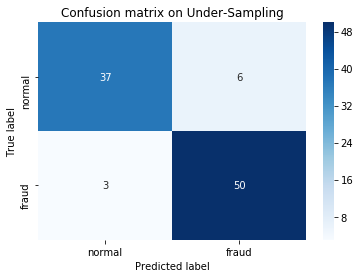

In [69]:
import seaborn as sns
def metric(y_t,y_p,title):
    cm=confusion_matrix(y_t,y_p)
    ac=accuracy_score(y_t,y_p)
    print('accuracy',ac)
    rs=recall_score(y_t,y_p)
    print("recall_score",rs)
    df_cm=pd.DataFrame(cm,index=[i for i in['normal','fraud']],
                       columns=[k for k in ['normal','fraud']])
    sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# 在下采样数据上test的真实值与预测值的对比
metric(y_test_undersample,y_pred_undersample,'Confusion matrix on Under-Sampling')

accuracy 0.9022744118909218
recall_score 0.9482758620689655


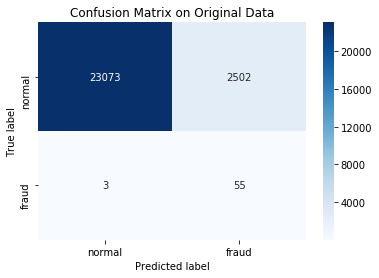

In [43]:
# 在下采样数据上test的真实值与预测值的对比
# Still a very decent recall accuracy when applying it to a much larger and skewed dataset!
metric(y_test,y_pred,'Confusion Matrix on Original Data')

#### 以上，可以看到，在真实数据上，用下采样方法得到的recall和accuracy都很好，但是误杀率很高。这会导致企业拒贷惜贷，利润下降。

## ROC curve and Precision-Recall curve.

- precision-recall curve much more convenient in this case as our problems relies on the "positive" class being more interesting than the negative class。考虑到了交叉类。
- AUC and ROC curve are also interesting to check if the model is also predicting as a whole correctly and not making many errors，但是因为正负样本太悬殊，99.8%的正样本，正确率其实没啥用。

In [48]:
def plot_roc(y_real,y_pred,tt):
    # ROC CURVE
    fpr, tpr,threshols = roc_curve(y_test_undersample,y_pred_undersample)
    roc_auc= auc(fpr,tpr)

    # plot ruc
    plt.title('Receiver Operating Characteristic'+ tt)
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

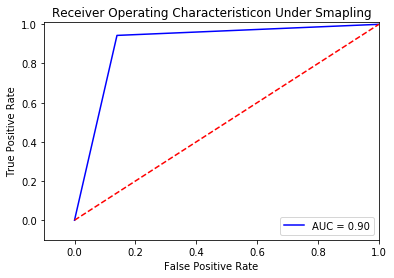

In [49]:
plot_roc(y_test_undersample,y_pred_undersample,tt='on Under Smapling')

sensitivity, recall, hit rate, or true positive rate (TPR)：
$$\frac{T_p}{T_p+F_n} = \frac{T_p}{P}$$

specificity, selectivity or true negative rate (TNR):$$\frac{T_n}{T_n+F_p} = \frac{T_n}{n} = 1 - TPR $$

#### ROC的横轴和纵轴分别针对不同类别，在极偏的数据中（原数据）中和下采样之后的数据，比例没有变。

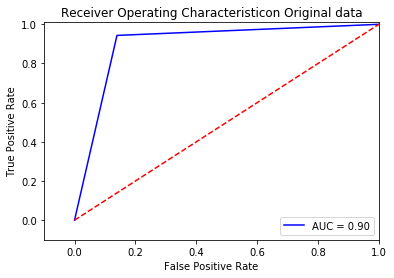

In [50]:
plot_roc(y_test,y_pred,tt='on Original data')

## Precision Recall Curve

In [59]:
def plot_prc(y_real,y_pred,tt=''):    
    precision, recall, thresholds = precision_recall_curve(y_real,
                                                               y_pred)
    # Plot Precision-Recall curve
    plt.plot(recall, precision)            
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall on'+tt)

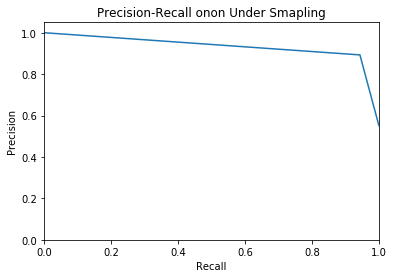

In [60]:
plot_prc(y_test_undersample,y_pred_undersample,tt='on Under Smapling')

$$Precision = \frac{T_p}{T_p+F_p}$$

$$Recall = \frac{T_p}{T_p + F_n}$$

precision：真实并被预测到的fraud的用户 / 被预测到的用户<br>
recall： 真实并被预测到的fraud的用户 / 真实fraud的用户

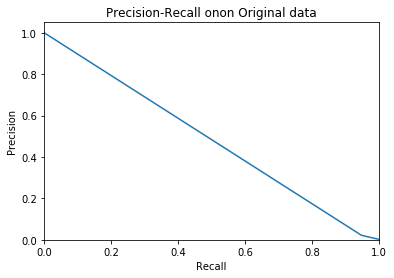

In [61]:
# 效果很差
plot_prc(y_test,y_pred,tt='on Original data')

## Changing classification threshold

如果样本极不均衡，0要多很多，那么提高threshold就会有更多数据被分到0类，很合理，很具有现实意义了。

In [83]:
import seaborn as sns
def metric(y_t,y_p):
    cm=confusion_matrix(y_t,y_p)
    ac=accuracy_score(y_t,y_p)
    rs=recall_score(y_t,y_p)
    df_cm=pd.DataFrame(cm,index=[i for i in['normal','fraud']],
                       columns=[k for k in ['normal','fraud']])
    sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
    plt.title("accuracy="+str(round(ac,2))+"\n"+"recall="+str(round(rs,2))+
              "\n"+"mean performance"+str(round((ac+rs)/2,2)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


### 在下采样数据上测试

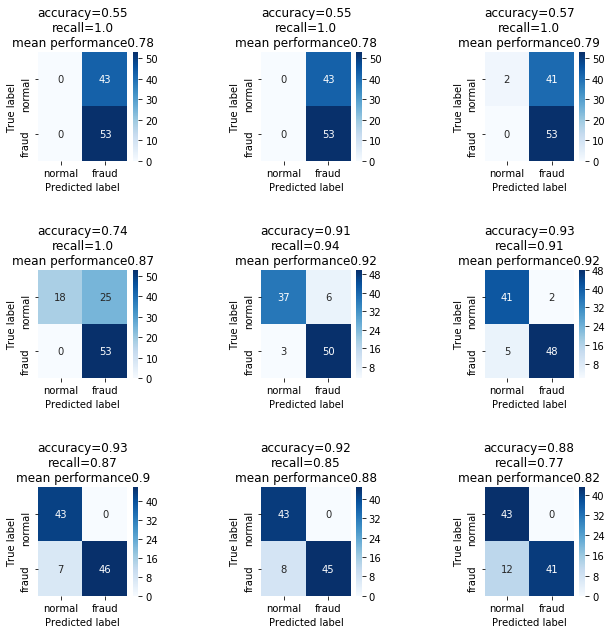

In [84]:
y_pred_undersample_proba=lr.predict_proba(x_test_undersample)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
j=1
plt.figure(figsize=(10,10))
# fig.tight_layout()#调整整体空白
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    plt.subplot(3,3,j)
    plt.subplots_adjust(wspace =1, hspace =1)#调整子图间距
    j += 1
    # metric function is for ploting confusion matrix
    metric(y_test_undersample,y_test_predictions_high_recall)

### 以上，得到综合而言，在下采样后的数据上，threshold=0.5最好。

### 在原数据上测试

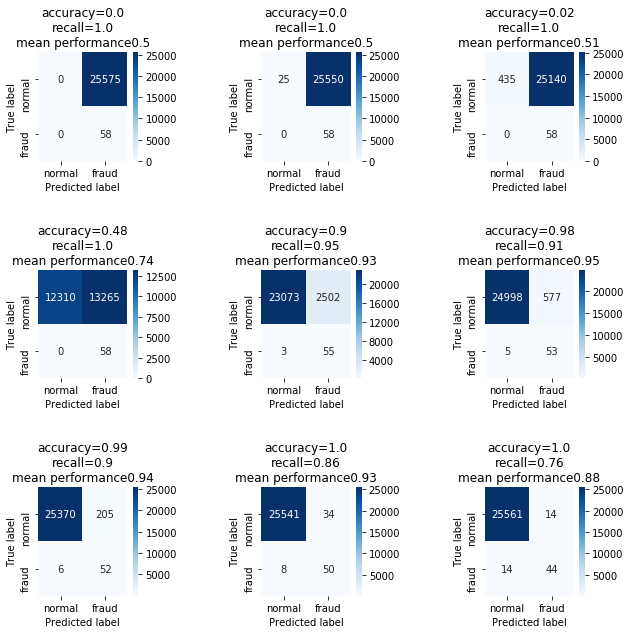

In [86]:
y_pred_undersample_proba=lr.predict_proba(x_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
j=1
plt.figure(figsize=(10,10))
# fig.tight_layout()#调整整体空白
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    plt.subplot(3,3,j)
    plt.subplots_adjust(wspace =1, hspace =1)#调整子图间距
    j += 1
    # metric function is for ploting confusion matrix
    metric(y_test,y_test_predictions_high_recall)

### 以上，得到综合而言，在原始数据上，threshold=0.6最好。但如果更多倾向于考虑recall值的话，为了更多的避免坏账率，threshold=0.5最好。